# Matplotlib Fundamentals
## 🚩 Goals
1. Understand the difference between the two primary Matplotlib plotting frameworks
2. Identify the key components of an object-oriented plot
3. Build different variations of line, bar and pie charts, as well as scatterplots and histograms
4. Customize charts by adding custom titles, labels, legends, annotations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. Compatible Data Types
- Python list, tuple
- Numpy arrays
- Pandas series, dataframe

### 2. Plotting Dataframe
- When plotting a dataframe, Matplotlib will...
    - Use the 'index' as the x-axis
    - Plot each column as a separate series by default
- Plotting each series independently allows for improved customization

Text(0.5, 1.0, 'Product Sales and Profits')

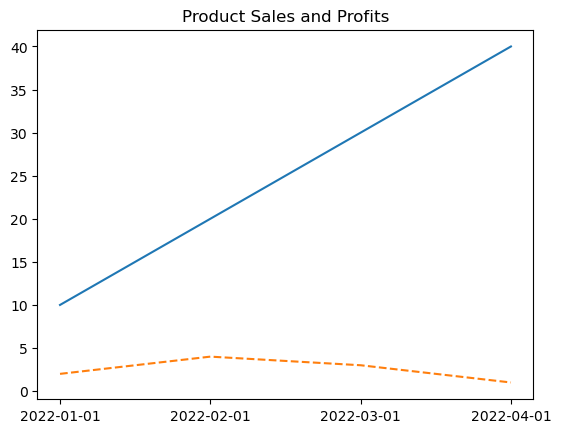

In [2]:
data_dict = {
    'Sales': [10, 20, 30, 40],
    'Profits': [2, 4, 3, 1],
    'Date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01']
}

df = pd.DataFrame(
    data_dict,
    columns=['Sales', 'Profits'],
    index=data_dict['Date']
)

fig, ax = plt.subplots()

# ax.plot(df)
ax.plot(df.index, df['Sales'])
ax.plot(df.index, df['Profits'], linestyle='--')
ax.set_title('Product Sales and Profits')

#### 📚 과제

In [3]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')

hotels['date'] = (
    pd.to_datetime('2018-12-31')
    - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

daily_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)
monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


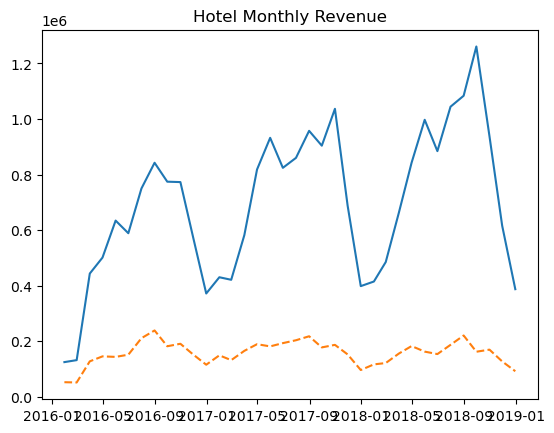

In [4]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], linestyle='--')
ax.set_title('Hotel Monthly Revenue');

### 3. Chart Titles, Axis Labels
- Chart Titles: ax.set_title
- Axis Labels: ax.set_xlabel/ax.set_ylabel

In [5]:
housing_raw = pd.read_csv(
    './data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)

In [9]:
ca_housing = housing_raw[housing_raw['region_name'].str.contains('CA')].assign(
    region_name=housing_raw['region_name'].str[:-11])
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [10]:
ca_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.1+ MB


In [11]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='median_active_list_price'
).assign(CA_average=lambda x: x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [14]:
ca_housing_markets = ca_housing_pivot.loc[
    :,
    ['San Francisco', 'Los Angeles', 'San Diego', 'CA_average']
]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


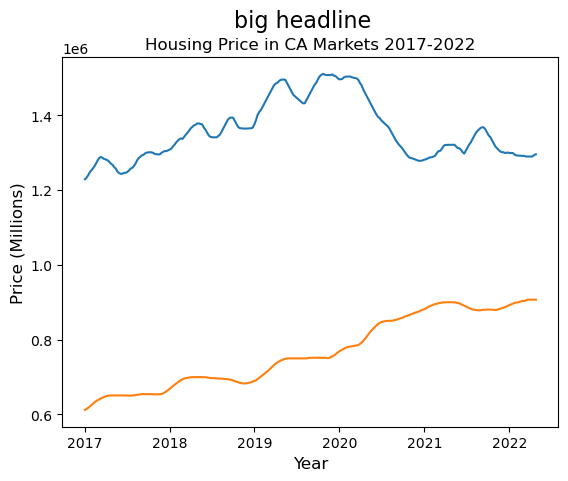

In [37]:
# title, label Setting
fig, ax = plt.subplots()

ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'])
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'])

fig.suptitle('big headline', fontsize=16)
ax.set_title('Housing Price in CA Markets 2017-2022', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Price (Millions)', fontsize=12);

### 4. Chart Legends
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- ax.legend
    - Location Arguments
        - loc: best, lower/center/upper/left/right의 조합
        - bbox_to_anchor: coordinate
    - Style Arguments
        - frameon: border of legend(boolean)
- ax.plot 안에 label 명시
- ⚠️ plotting order and legend sequence MUST MATCH

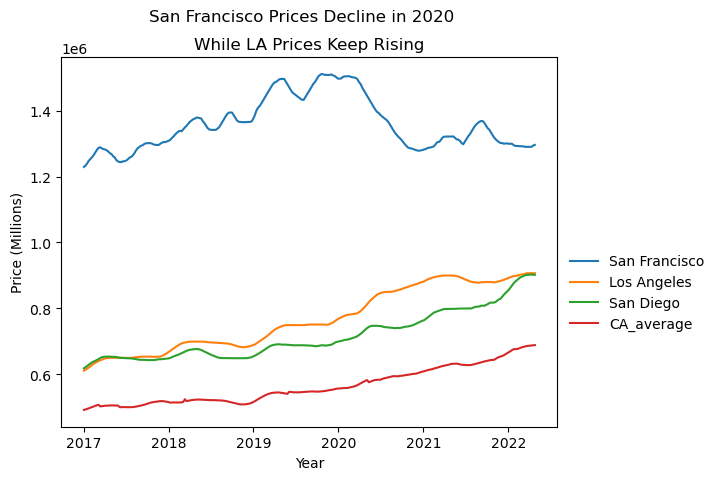

In [42]:
# title, label Setting
fig, ax = plt.subplots()

ax.plot(ca_housing_markets)

# ax.plot(
#     ca_housing_markets.index,
#     ca_housing_markets['San Francisco'],
#     label='San Francisco'
# )
# ax.plot(
#     ca_housing_markets.index,
#     ca_housing_markets['Los Angeles'],
#     label='Los Angeles'
# )

fig.suptitle('San Francisco Prices Decline in 2020')
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)');

ax.legend(ca_housing_markets.columns, bbox_to_anchor=(1, 0.5), frameon=False)